In [68]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, scipy 

In [69]:
DatA = pd.read_csv('Dataset_A.csv').to_numpy().T
ax, fa = DatA
print(DatA)

DatB = pd.read_csv('Dataset_B.csv').to_numpy().T
bx, fb = DatB
print(DatB)

DatC = pd.read_csv('Dataset_C.csv').to_numpy().T
cx, fc = DatC
print(DatC)

[[ 0.     0.2    0.4    0.6    0.8    1.     1.2    1.4    1.6    1.8
   2.     2.2    2.4    2.6    2.8    3.     3.2    3.4    3.6    3.8
   4.     4.2    4.4    4.6    4.8    5.     5.2    5.4    5.6    5.8
   6.     6.2    6.4    6.6    6.8    7.     7.2    7.4    7.6    7.8
   8.     8.2    8.4    8.6    8.8    9.     9.2    9.4    9.6    9.8
  10.   ]
 [ 5.747  5.155  4.668  4.163  3.658  3.328  2.957  2.65   2.338  2.129
   1.869  1.742  1.504  1.391  1.238  1.078  0.97   0.867  0.785  0.705
   0.648  0.555  0.495  0.51   0.455  0.428  0.333  0.338  0.259  0.243
   0.193  0.238  0.166  0.145  0.19   0.168  0.196  0.172  0.123  0.071
   0.138  0.073  0.135  0.078  0.058  0.08   0.06   0.119  0.1    0.126
   0.03 ]]
[[0.00000e+00 4.00000e-01 8.00000e-01 1.20000e+00 1.60000e+00 2.00000e+00
  2.40000e+00 2.80000e+00 3.20000e+00 3.60000e+00 4.00000e+00 4.40000e+00
  4.80000e+00 5.20000e+00 5.60000e+00 6.00000e+00 6.40000e+00 6.80000e+00
  7.20000e+00 7.60000e+00 8.00000e+00 8.40000e+

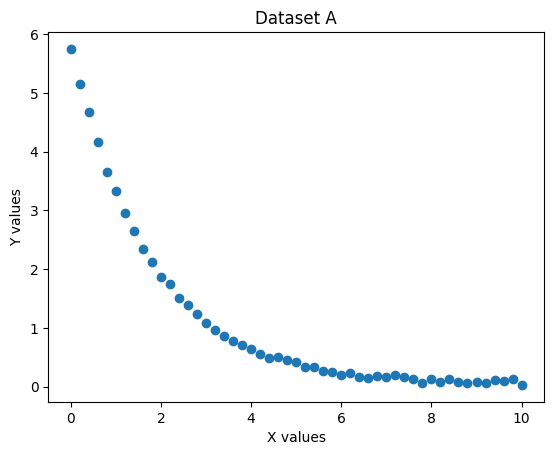

In [70]:
plt.scatter(ax, fa)
plt.title("Dataset A")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# Decay rate
## A(t)=A*e^(-dt)
### Where   A: initial activity
### and     B: decay constant

In [71]:
def f_a(t, A1, B1):
    return A1 * np.exp(-B1*t)

In [72]:
a_params, a_cov = scipy.optimize.curve_fit(f_a, ax, fa)

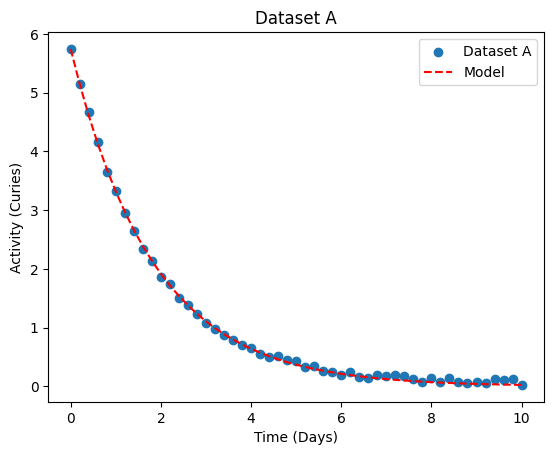

In [73]:
plt.scatter(ax, fa, label = 'Dataset A')
plt.plot(ax, f_a(ax, *a_params), color = 'red', linestyle = '--', label='Model')
plt.title("Dataset A")
plt.xlabel("Time (Days)")
plt.ylabel("Activity (Curies)")
plt.legend()
plt.show()

In [74]:
print(f"A: Initial Activity = {a_params[0]:.3} +/- {np.diag(a_cov)[0]:.3}")
print(f"B: Decay Constant = {a_params[1]:.3} +/- {np.diag(a_cov)[1]:.3}")

A: Initial Activity = 5.74 +/- 0.000602
B: Decay Constant = 0.549 +/- 1.22e-05


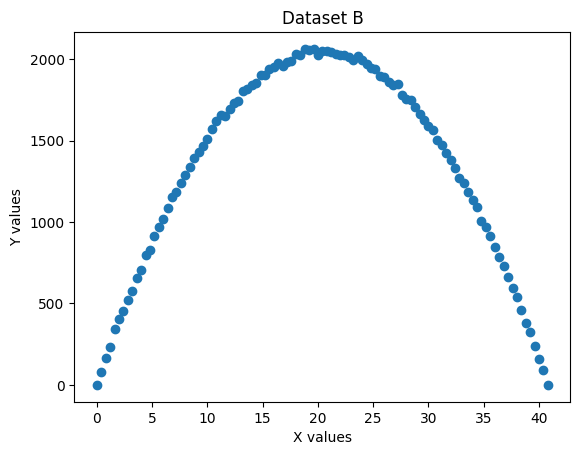

In [75]:
plt.scatter(bx, fb)
plt.title("Dataset B")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# Rocket Tragectory Equation

\begin{align*}
     \frac{1}{2}{a}{t^2}+vt+x
\end{align*} 

In [76]:
def f_b(t, A2, B2, C2):
    return 0.5*A2*t**2 + B2 * t + C2

In [77]:
b_params, b_cov = scipy.optimize.curve_fit(f_b, bx, fb)

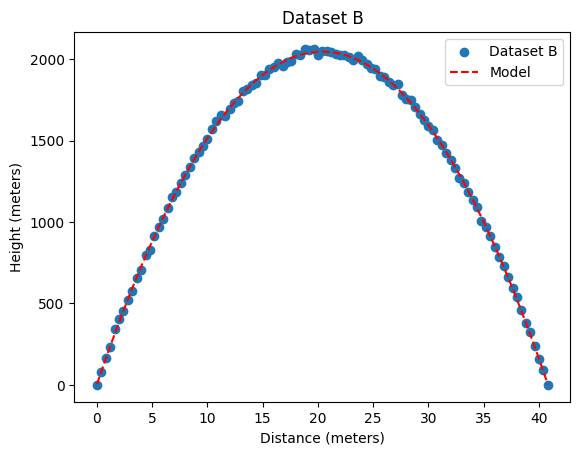

In [85]:
plt.scatter(bx, fb, label = 'Dataset B')
plt.plot(bx, f_b(bx, *b_params), color = 'red', linestyle = '--', label='Model')
plt.title("Dataset B")
plt.xlabel("Distance (meters)")
plt.ylabel("Height (meters)")
plt.legend()
plt.show()

In [79]:
print(f"A: Acceleration = {b_params[0]:.3} +/- {np.diag(b_cov)[0]:.3}")
print(f"B: Velocity = {b_params[1]:.3} +/- {np.diag(b_cov)[1]:.3}")
print(f"C: Height = {b_params[2]:.3} +/- {np.diag(b_cov)[2]:.3}")

A: Acceleration = -9.8 +/- 0.000343
B: Velocity = 2e+02 +/- 0.153
C: Height = 3.99 +/- 11.9


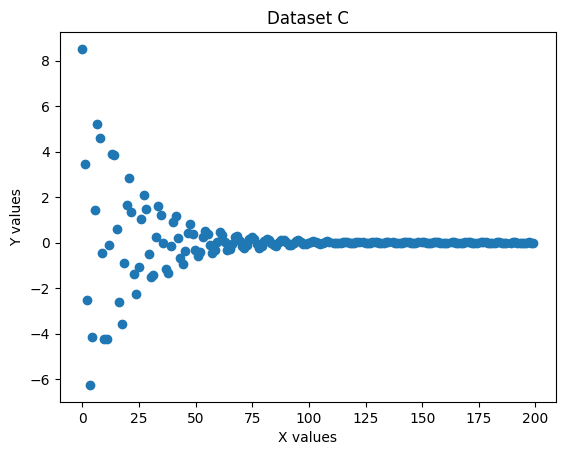

In [80]:
plt.scatter(cx, fc)
plt.title("Dataset C")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

# Damped Harmonic Oscillator

\begin{align*}
    Ae^{- \lambda t}\sin(\omega t + x)
\end{align*} 

In [88]:
def f_c(t, A3, B3, C3, D3):
    return A3 * np.exp(-B3 * t) * np.cos(C3 * t + D3)

In [89]:
c_params, c_cov = scipy.optimize.curve_fit(f_c, cx, fc)

C:\Users\micha\AppData\Local\Temp\ipykernel_2100\87767712.py:2: RuntimeWarning: overflow encountered in exp
  return A3 * np.exp(-B3 * t) * np.cos(C3 * t + D3)
C:\Users\micha\AppData\Local\Temp\ipykernel_2100\87767712.py:2: RuntimeWarning: overflow encountered in multiply
  return A3 * np.exp(-B3 * t) * np.cos(C3 * t + D3)


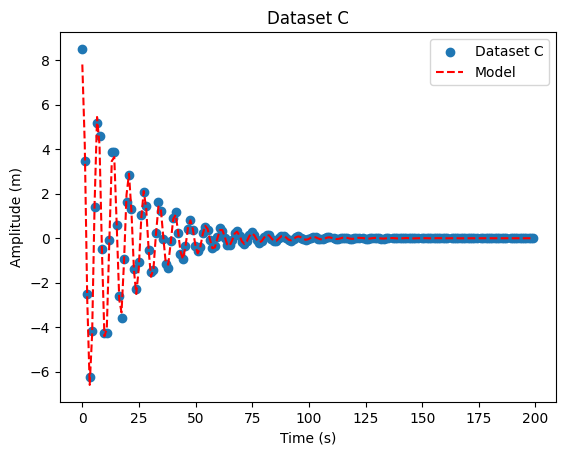

In [90]:
plt.scatter(cx, fc, label = 'Dataset C')
plt.plot(cx, f_c(cx, *c_params), color = 'red', linestyle = '--', label='Model')
plt.title("Dataset C")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (m)")
plt.legend()
plt.show()

In [91]:
print(f"A: Amplitude = {c_params[0]:.3} +/- {np.diag(c_cov)[0]:.3}")
print(f"B: Damping Constant = {c_params[1]:.3} +/- {np.diag(c_cov)[1]:.3}")
print(f"C: Angular Frequency = {c_params[2]:.3} +/- {np.diag(c_cov)[2]:.3}")
print(f"D: Phase Shift = {c_params[3]:.3} +/- {np.diag(c_cov)[3]:.3}")

A: Amplitude = 7.81 +/- 0.00447
B: Damping Constant = 0.0477 +/- 3.71e-07
C: Angular Frequency = -0.923 +/- 4.12e-07
D: Phase Shift = 0.028 +/- 9.16e-05
